In [1]:
import numpy as np
import torch 
import os
region=[-25., 25, -30, 30, -10, 60]
N=1000
x01 = np.random.uniform(region[0],region[1],(N, 1))
x02 = np.random.uniform(region[2],region[3],(N, 1))
x03 = np.random.uniform(region[4],region[5],(N, 1))
x0=np.hstack([x01, x02, x03])/10
x0 = torch.tensor(x0, dtype = torch.float)
local =  'outputs/LS_28_seed0/model_best.pkl' 
Net = torch.load(local, map_location='cpu')
if os.path.exists('pre28.npy'):
    print('presiction has been generated') 
    traj_pre = np.load('pre28.npy')
else:
    with torch.no_grad():
        traj_pre = Net.predict(x0, h=0.01, steps=20000, returnnp=True)
    pre28 = traj_pre[-10000:].reshape([-1,3])
    np.save('pre28', pre28)
print(traj_pre.shape)

local_em =  'outputs/LSem_28_seed0/model_best.pkl' 
Net_em = torch.load(local_em, map_location='cpu')
if os.path.exists('pre_em28.npy'):
    print('presiction has been generated') 
    traj_pre_em = np.load('pre_em28.npy')
else:
    with torch.no_grad():
        traj_pre_em = Net_em.predict(x0, h=0.01, steps=20000, returnnp=True)
    pre_em28 = traj_pre_em[-10000:].reshape([-1,3])
    np.save('pre_em28', pre_em28)
print(traj_pre_em.shape)


local_cub =  'outputs/LScub_28_seed1/model_best.pkl' 
Net_cub = torch.load(local_cub, map_location='cpu')
if os.path.exists('pre_cub28.npy'):
    print('presiction has been generated') 
    traj_pre_cub = np.load('pre_cub28.npy')
else:
    with torch.no_grad():
        traj_pre_cub = Net_cub.predict(x0, h=0.01, steps=20000, returnnp=True)
    pre_cub28 = traj_pre_cub[-10000:].reshape([-1,3])
    np.save('pre_cub28', pre_cub28)
print(traj_pre_cub.shape)


from LSData import LSData
Data=LSData(h=0.01, steps = N, length=1, num_train_traj=0, num_test_traj=0)
if os.path.exists('true28.npy'):
    print('ground truth has been generated') 
    traj_true = np.load('true28.npy')
else:
    traj_true = Data.solver.flow(x0, torch.tensor(0.01), 20000).numpy()
    true28 = traj_true[-10000:].reshape([-1,3])
    np.save('true28', true28)
print(traj_true.shape)


presiction has been generated
(10000000, 3)
presiction has been generated
(10000000, 3)
presiction has been generated
(10000000, 3)
r= 28
(0, 3)
(0, 3)
ground truth has been generated
(20001000, 3)


sss
0.014511473699268746
0.011672640195326562


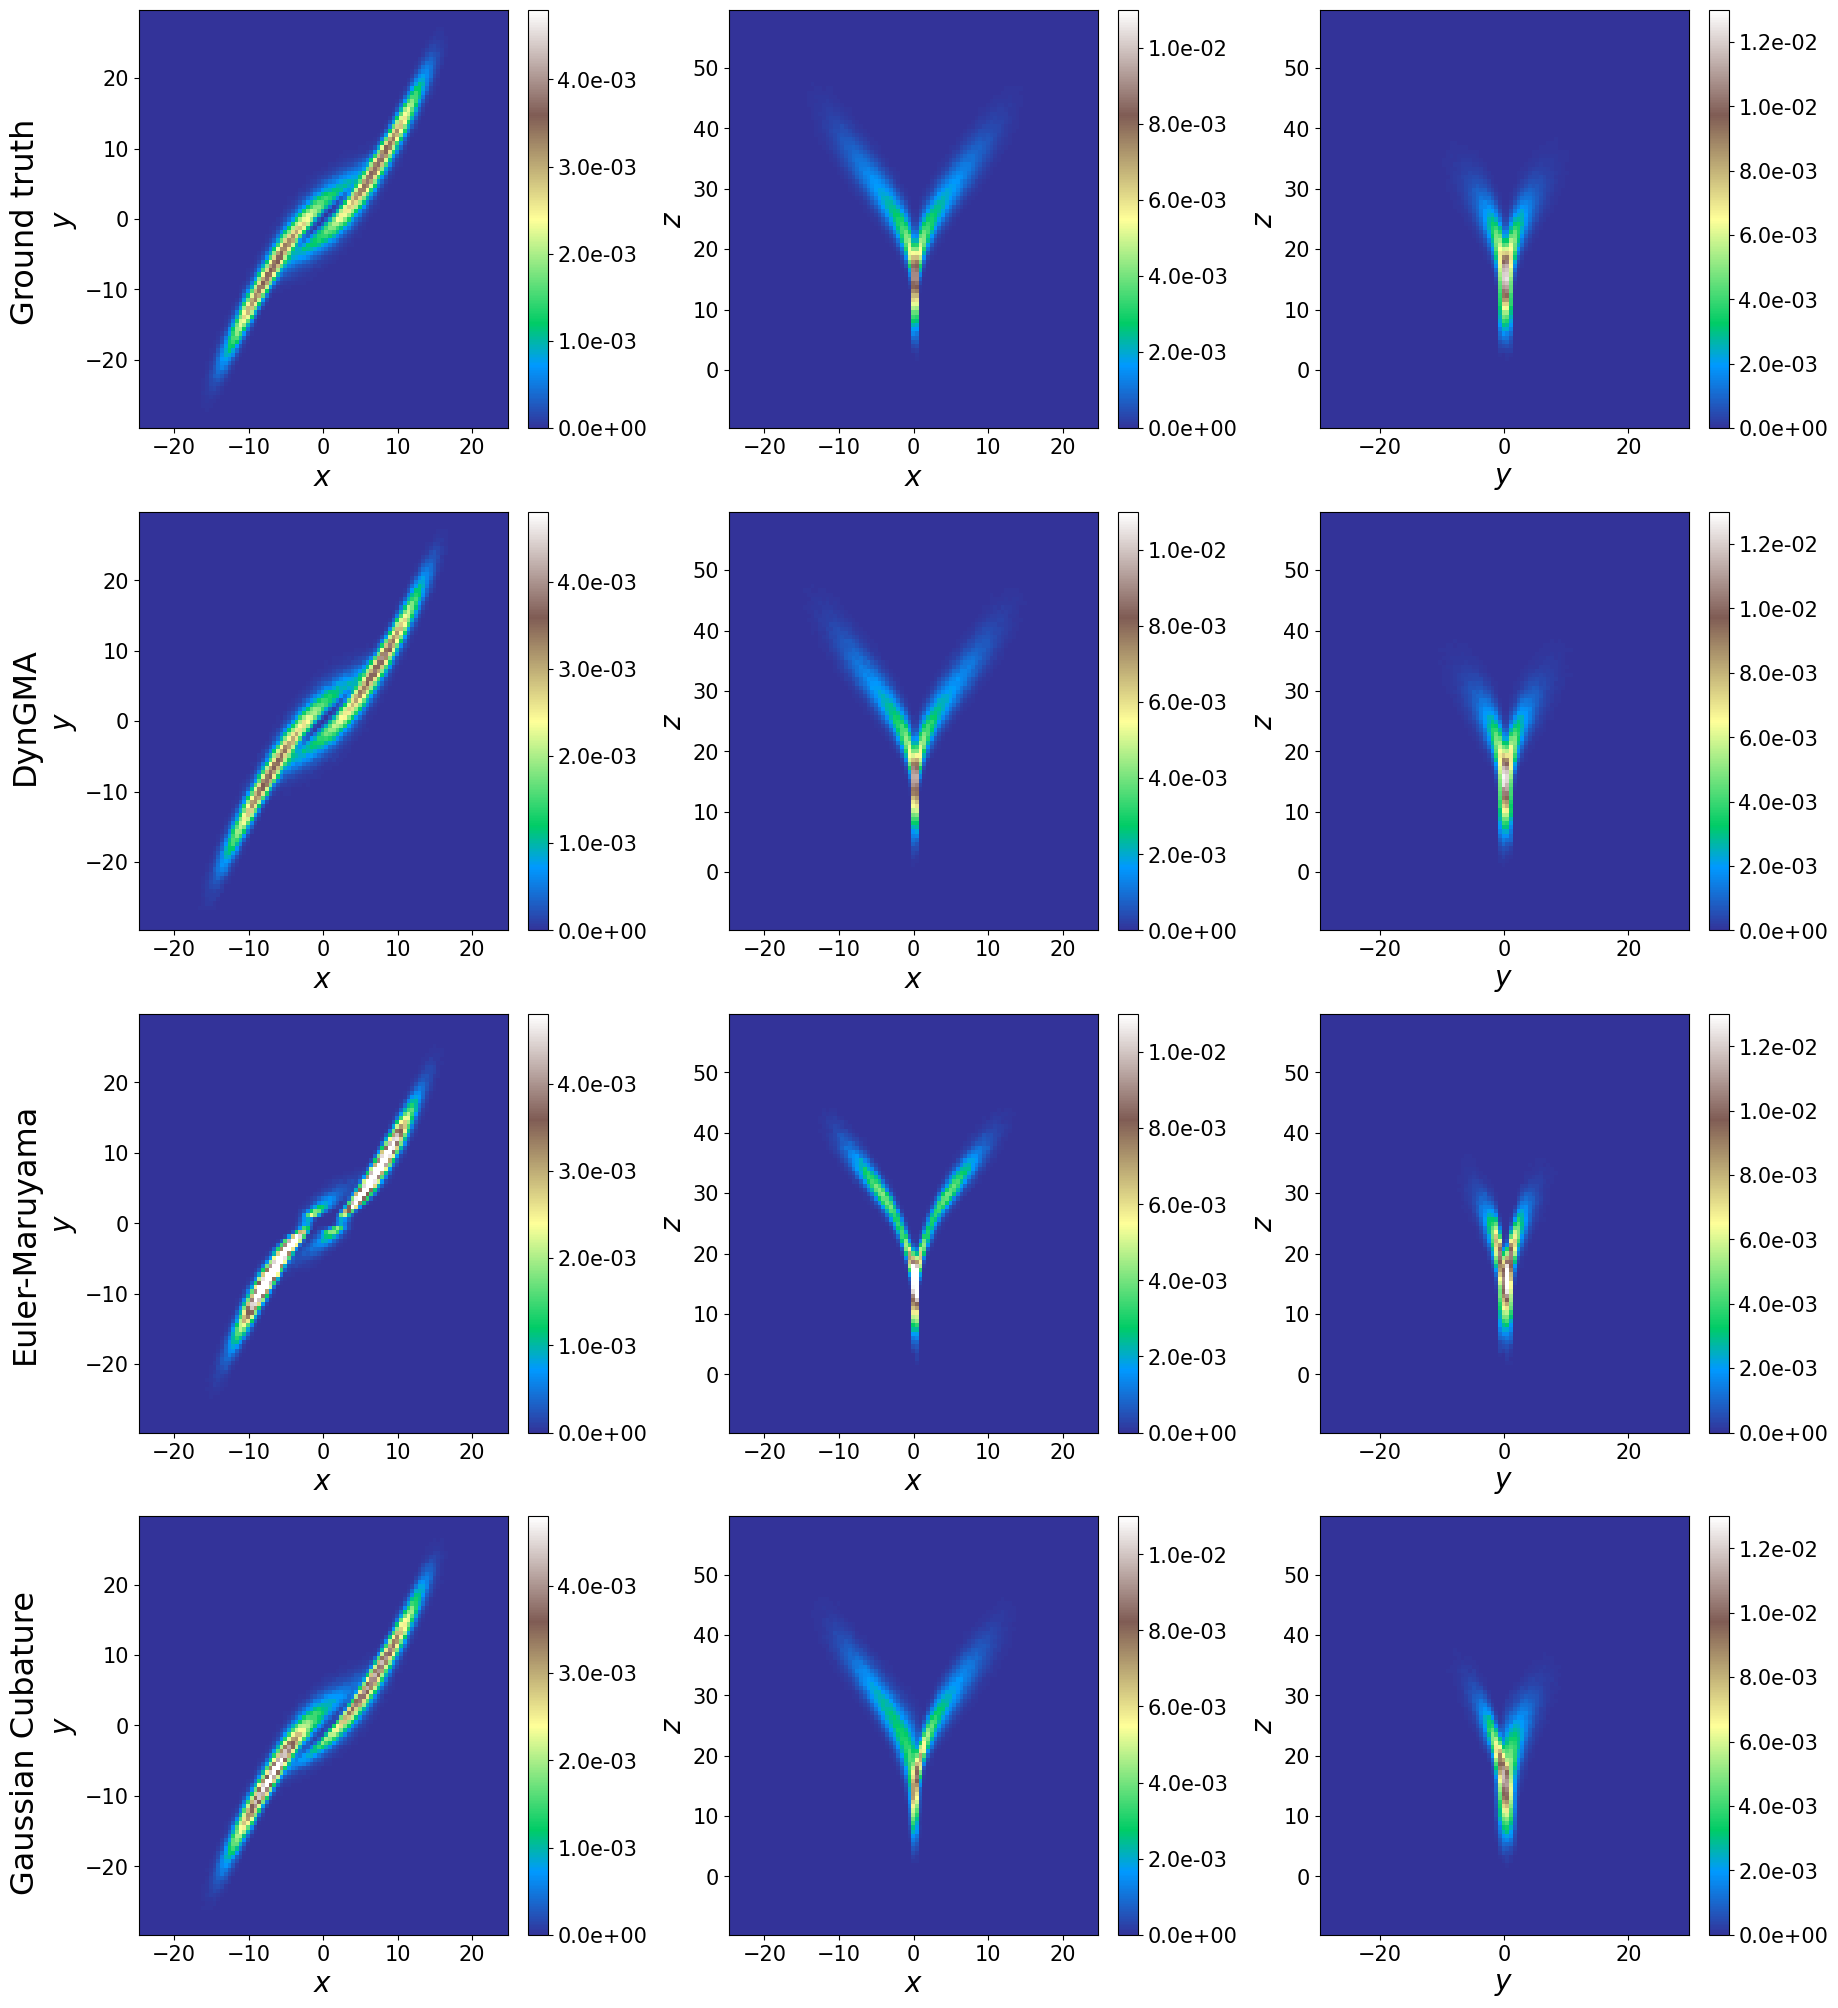

In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors

N=100
normxy = colors.Normalize(vmin=0, vmax=0.0048)
normxz = colors.Normalize(vmin=0, vmax=0.011)
normyz = colors.Normalize(vmin=0, vmax=0.013)
fig = plt.figure(figsize=(20, 25))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
    wspace=0.6, hspace=0.2)

gs = gridspec.GridSpec(nrows=4, ncols=3, height_ratios=[1, 1, 1,1])
print('sss')
####################  plot vf
cmap='gist_earth'
cmap='terrain'
axt = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,2])]


x0n=np.load('true28.npy')
### x- y 
data = x0n[(x0n[:, 2]>2.45)& (x0n[:, 2]<2.55)][:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-3,3,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c0 = axt[0].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxy, cmap=cmap)


### x-z
data = x0n[(x0n[:, 1]>-0.05)& (x0n[:, 1]<0.05)][:,::2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c1 = axt[1].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxz, cmap=cmap)

### y-z
data = x0n[(x0n[:, 0]>-0.05)& (x0n[:, 0]<0.05)][:,1:]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-3, 3], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-3,3,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c2 = axt[2].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normyz, cmap=cmap)

x0n=np.load('pre28.npy')
axp = [fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1]), fig.add_subplot(gs[1,2])]
### x- y 
data = x0n[(x0n[:, 2]>2.45)& (x0n[:, 2]<2.55)][:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-3,3,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c3 = axp[0].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxy, cmap=cmap)


### x-z
data = x0n[(x0n[:, 1]>-0.05)& (x0n[:, 1]<0.05)][:,::2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c4 = axp[1].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxz, cmap=cmap)

### y-z
data = x0n[(x0n[:, 0]>-0.05)& (x0n[:, 0]<0.05)][:,1:]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-3, 3], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-3,3,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c5 = axp[2].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normyz, cmap=cmap)


x0n=np.load('pre_em28.npy')
axe = [fig.add_subplot(gs[2,0]), fig.add_subplot(gs[2,1]), fig.add_subplot(gs[2,2])]
### x- y 
data = x0n[(x0n[:, 2]>2.45)& (x0n[:, 2]<2.55)][:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-3,3,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c6 = axe[0].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxy, cmap=cmap)


### x-z
data = x0n[(x0n[:, 1]>-0.05)& (x0n[:, 1]<0.05)][:,::2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c7 = axe[1].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxz, cmap=cmap)

### y-z
data = x0n[(x0n[:, 0]>-0.05)& (x0n[:, 0]<0.05)][:,1:]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-3, 3], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-3,3,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c8 = axe[2].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normyz, cmap=cmap)
print((hist.T/data.shape[0]).max())


x0n=np.load('pre_cub28.npy')
axc = [fig.add_subplot(gs[3,0]), fig.add_subplot(gs[3,1]), fig.add_subplot(gs[3,2])]
### x- y 
data = x0n[(x0n[:, 2]>2.45)& (x0n[:, 2]<2.55)][:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-3,3,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c6 = axc[0].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxy, cmap=cmap)


### x-z
data = x0n[(x0n[:, 1]>-0.05)& (x0n[:, 1]<0.05)][:,::2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c7 = axc[1].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normxz, cmap=cmap)

### y-z
data = x0n[(x0n[:, 0]>-0.05)& (x0n[:, 0]<0.05)][:,1:]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-3, 3], [-1,6]],bins=(N, N))
# 
xx     = np.linspace(-3,3,N+1)
yy     = np.linspace(-1,6,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
c8 = axc[2].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], norm=normyz, cmap=cmap)
print((hist.T/data.shape[0]).max())

for au_ax in [axt, axp, axe, axc]:
    for ind, c in enumerate([c0, c1, c2]):
        cax = fig.add_axes([au_ax[ind].get_position().x1+0.01, au_ax[ind].get_position().y0,
                        0.01,au_ax[ind].get_position().height+ au_ax[ind].get_position().y0-au_ax[ind].get_position().y0]) 
        cb=fig.colorbar(c, ax=[axt[0], axp[0], axe[0]], cax= cax, format='%.1e')
        cb.ax.tick_params(labelsize=15)


axt[0].text(-42, -14, 'Ground truth', fontsize=23, rotation='vertical')
axp[0].text(-42, -8, 'DynGMA', fontsize=23, rotation='vertical')
axe[0].text(-42, -19, 'Euler-Maruyama', fontsize=23, rotation='vertical')
axc[0].text(-42, -23, 'Gaussian Cubature', fontsize=23, rotation='vertical')

xsize=20
for au_ax in [axt, axp, axe, axc]:
    au_ax[0].tick_params(labelsize=15)
    au_ax[1].tick_params(labelsize=15)
    au_ax[2].tick_params(labelsize=15)
    
    au_ax[0].set_xlabel(r'$x$', fontsize=xsize)
    au_ax[0].set_ylabel(r'$y$', fontsize=xsize)
    au_ax[0].tick_params(labelsize=15)

    au_ax[1].set_xlabel(r'$x$', fontsize=xsize)
    au_ax[1].set_ylabel(r'$z$', fontsize=xsize)
    au_ax[1].tick_params(labelsize=15)

    au_ax[2].set_xlabel(r'$y$', fontsize=xsize)
    au_ax[2].set_ylabel(r'$z$', fontsize=xsize)
    au_ax[2].tick_params(labelsize=15)

# axf[3].set_xlabel(r'$x$', fontsize=xsize)
# axf[3].set_ylabel(r'$y$', fontsize=xsize)

# axf[4].set_xlabel(r'$x$', fontsize=xsize)
# axf[4].set_ylabel(r'$z$', fontsize=xsize)

# axf[5].set_xlabel(r'$x$', fontsize=xsize)
# axf[5].set_ylabel(r'$z$', fontsize=xsize)
fig.savefig('ls.png', bbox_inches='tight', dpi=100) 

In [1]:
import numpy as np
import torch 
import os
region=[-25., 25, -30, 30, -10, 60]
N=10000
x01 = np.random.uniform(region[0],region[1],(N, 1))
x02 = np.random.uniform(region[2],region[3],(N, 1))
x03 = np.random.uniform(region[4],region[5],(N, 1))
x0=np.hstack([x01, x02, x03])/10
x0 = torch.tensor(x0, dtype = torch.float)
local =  'outputs/LS_28_seed0/model_best.pkl' 
Net = torch.load(local, map_location='cpu')
with torch.no_grad():
    traj_pre = Net.predict(x0, h=0.001, steps=4000, returnnp=True)
print(traj_pre.shape)

local =  'outputs/LScub_28_seed1/model_best.pkl' 
Net_em = torch.load(local, map_location='cpu')
with torch.no_grad():
    traj_em = Net_em.predict(x0, h=0.001, steps=4000, returnnp=True)
print(traj_em.shape)


from LSData import LSData
Data=LSData(h=0.01, steps = N, length=1, num_train_traj=0, num_test_traj=0)
traj_true = Data.solver.flow(x0, torch.tensor(0.001), 4000).numpy()

print(traj_true.shape)

(4001, 10000, 3)
(4001, 10000, 3)
r= 28
(0, 3)
(0, 3)
(10000, 4001, 3)


In [4]:
import numpy as np

def error(a):
    return (a**2).mean()
# 生成一些多维数据

step=350
# 定义直方图箱的数量
bins = 100

# 指定每个维度上的范围
ranges = [(-2.5, 2.5), (-3, 3), (-1, 6)]

# 计算多维直方图
for i in range(5):
    data = traj_true[:,step*2**i,:]
    hist_true, edges = np.histogramdd(data, bins=bins, range=ranges)
    data = traj_pre[step*2**i,:,:]
    hist_pre, edges = np.histogramdd(data, bins=bins, range=ranges)
    data = traj_em[step*2**i,:,:]
    hist_em, edges = np.histogramdd(data, bins=bins, range=ranges)
    print(error(hist_true - hist_pre))
    print(error(hist_true - hist_em))

0.019871
0.019952
0.02007
0.020514
0.020276
0.021072
0.020317
0.020424


IndexError: index 5600 is out of bounds for axis 1 with size 4001

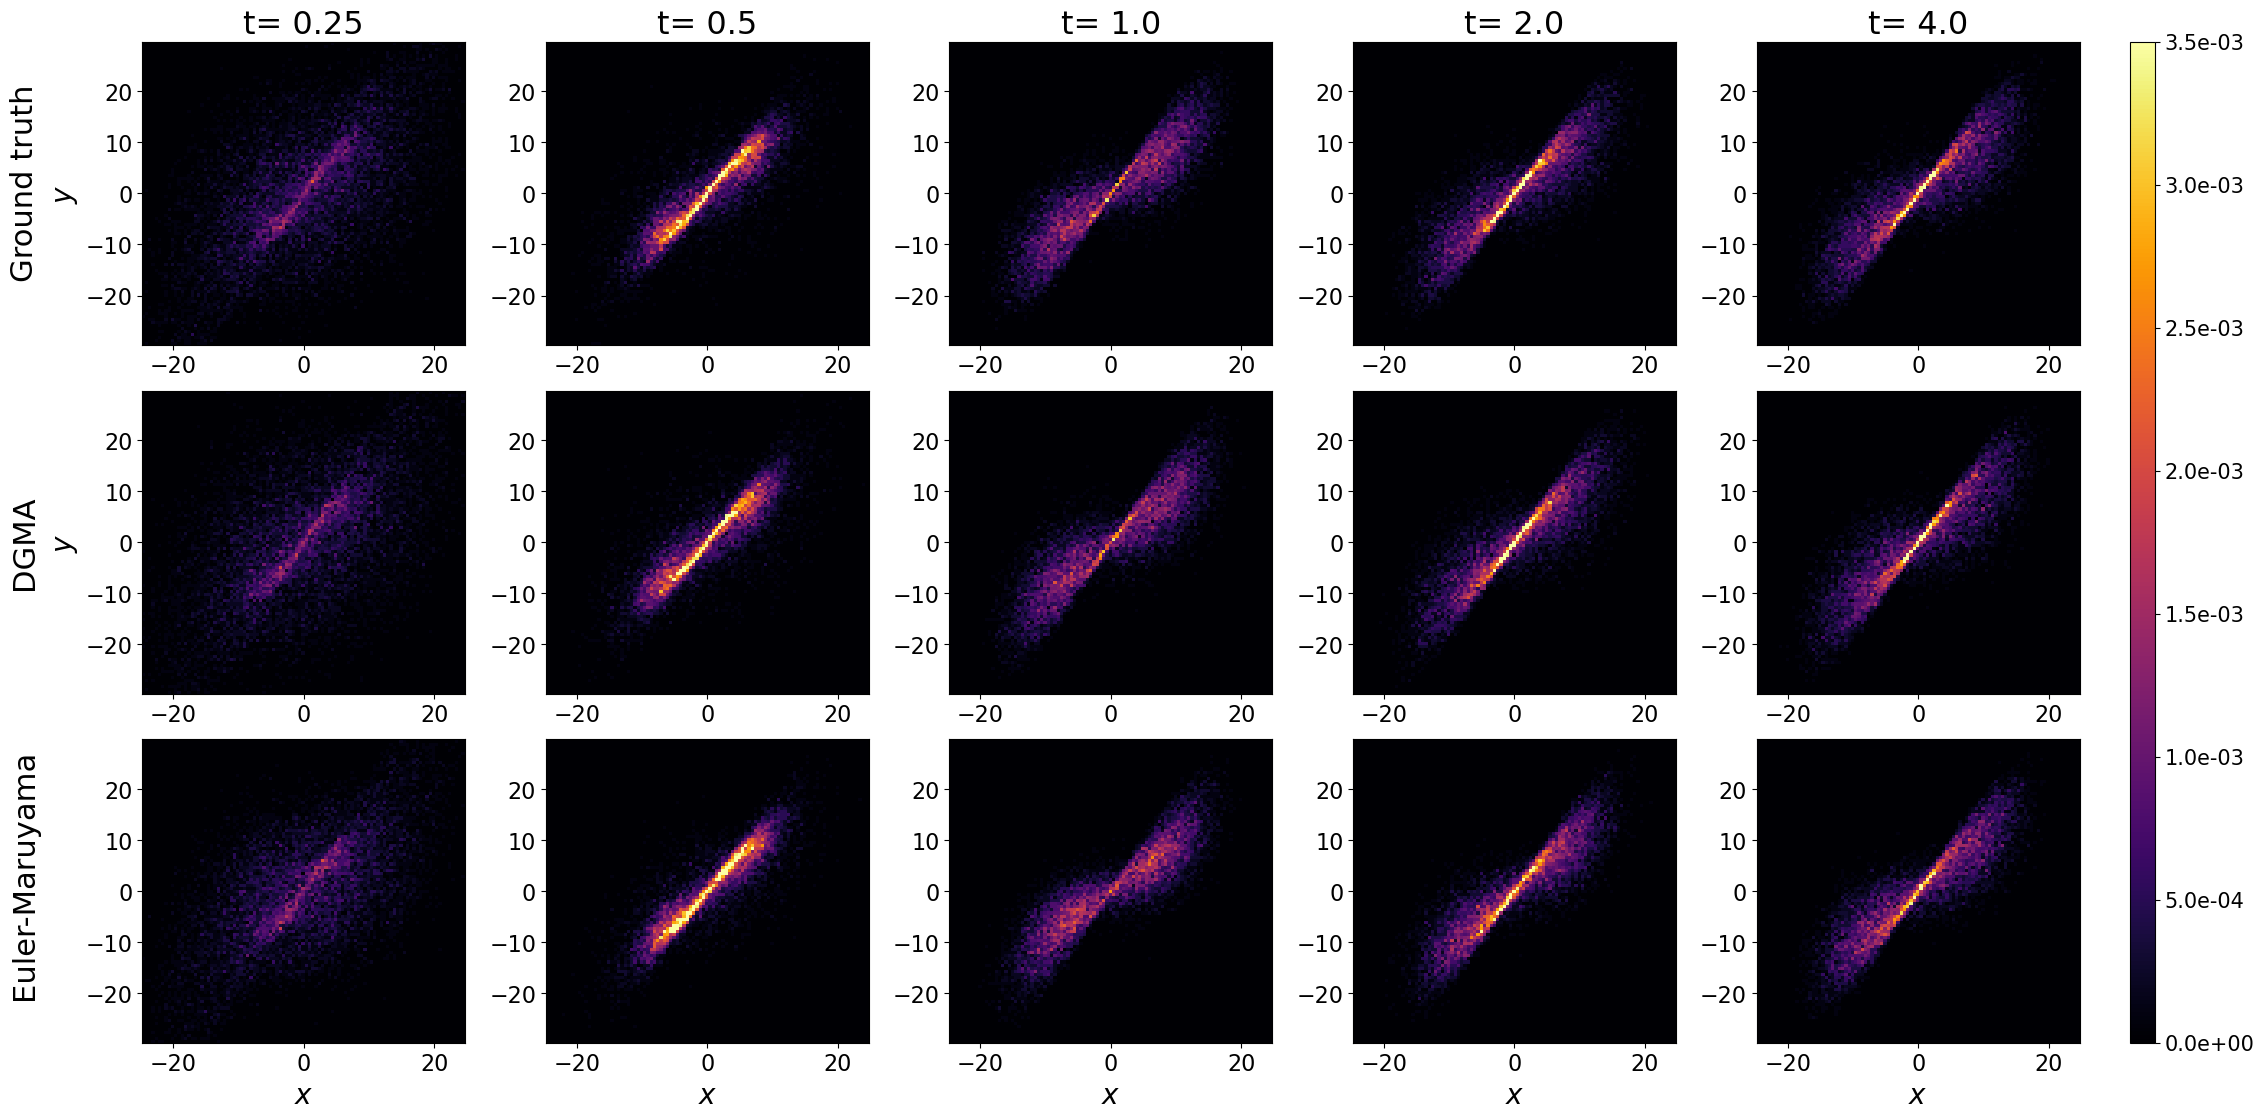

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
import numpy as np
N=100
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-3,3,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
step=25

fig = plt.figure(figsize=(25, 13))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
    wspace=0.25, hspace=0.15)

gs = gridspec.GridSpec(nrows=3, ncols=5, height_ratios=[1, 1, 1])
cmap='inferno'


hist_t = np.zeros([5, N, N]) 
for i in range(5):
    data = traj_true[:,step*2**i,:2]
    hist_t[i], xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))


hist_p = np.zeros([5, N, N]) 
for i in range(5):
    data = traj_pre[step*2**i,:,:2]
    hist_p[i], xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))    

    
hist_e = np.zeros([5, N, N]) 
for i in range(5):
    data = traj_em[step*2**i,:,:2]
    hist_e[i], xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))     

 
norm = colors.Normalize(vmin=0, vmax=0.0035)    

ax_t = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,2]),
       fig.add_subplot(gs[0,3]), fig.add_subplot(gs[0,4])]  
ax_p = [fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1]), fig.add_subplot(gs[1,2]),
       fig.add_subplot(gs[1,3]), fig.add_subplot(gs[1,4])]  
ax_e = [fig.add_subplot(gs[2,0]), fig.add_subplot(gs[2,1]), fig.add_subplot(gs[2,2]),
       fig.add_subplot(gs[2,3]), fig.add_subplot(gs[2,4])] 
for i in range(5):
    ctt = ax_t[i].pcolormesh(XX*10, YY*10, hist_t[i].T/data.shape[0], norm=norm, cmap=cmap)
    ctp = ax_p[i].pcolormesh(XX*10, YY*10, hist_p[i].T/data.shape[0], norm=norm, cmap=cmap)
    cte = ax_e[i].pcolormesh(XX*10, YY*10, hist_e[i].T/data.shape[0], norm=norm, cmap=cmap)
    
    
cax0 = fig.add_axes([ax_t[4].get_position().x1+0.02, ax_e[4].get_position().y0,
                    0.01,ax_t[4].get_position().height+ ax_t[4].get_position().y0-ax_e[4].get_position().y0])   

cb=fig.colorbar(cte, ax=[ax_t, ax_p, ax_e], cax=cax0, format='%.1e')
cb.ax.tick_params(labelsize=15)

ax_t[0].text(-45, -16, 'Ground truth', fontsize=22, rotation='vertical')
ax_p[0].text(-45, -8, 'DGMA', fontsize=22, rotation='vertical')
ax_e[0].text(-45, -20, 'Euler-Maruyama', fontsize=22, rotation='vertical')
for ax in ax_t:
    ax.tick_params(labelsize=16)
for ax in ax_p:
    ax.tick_params(labelsize=16)
for ax in ax_e:
    ax.tick_params(labelsize=16)    
    
xsize=20
for i in range(5):
    ax_t[i].set_title('t= {}'.format(0.01*25*2**i), fontsize=23) 
    ax_e[i].set_xlabel(r'$x$', fontsize=xsize)
ax_t[0].set_ylabel(r'$y$', fontsize=xsize)
ax_p[0].set_ylabel(r'$y$', fontsize=xsize)
fig.savefig('ls_traj.png', bbox_inches='tight', dpi=100) 

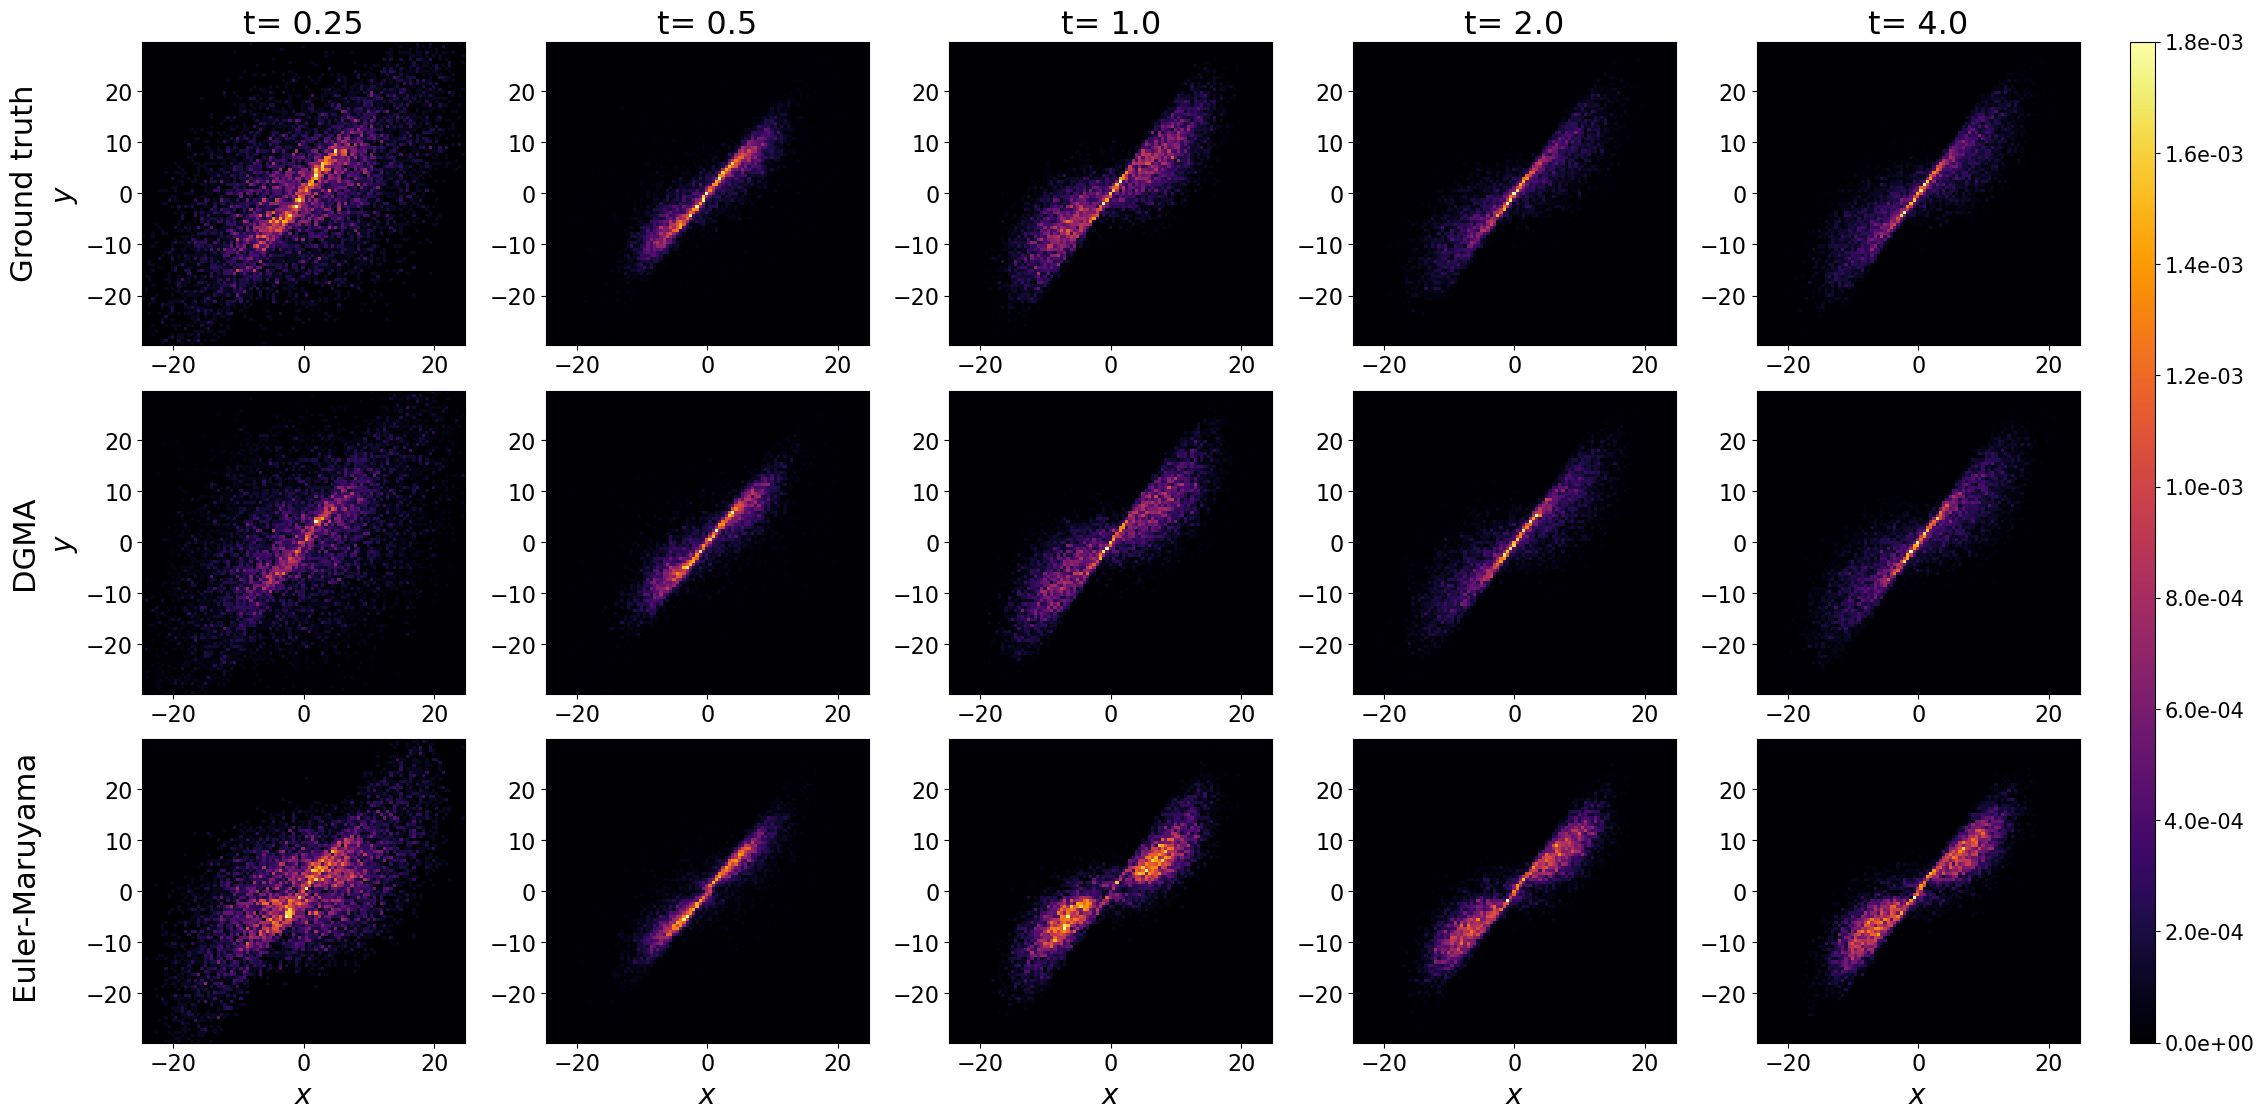

In [49]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
N=100
xx     = np.linspace(-2.5,2.5,N+1)
yy     = np.linspace(-3,3,N+1)
xx,yy  = (xx[:-1]+xx[1:])/2,(yy[:-1]+yy[1:])/2
XX,YY  = np.meshgrid(xx,yy)
step=25

fig = plt.figure(figsize=(25, 13))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
    wspace=0.25, hspace=0.15)

gs = gridspec.GridSpec(nrows=3, ncols=5, height_ratios=[1, 1, 1])
cmap='inferno'
ax_t = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,2]),
       fig.add_subplot(gs[0,3]), fig.add_subplot(gs[0,4])] 

data = traj_true[:,step,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ct0= ax_t[0].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_true[:,step*2,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ct1= ax_t[1].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_true[:,step*4,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ct2= ax_t[2].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)


data = traj_true[:,step*8,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ct3= ax_t[3].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_true[:,step*16,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ct4= ax_t[4].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

ax_p = [fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1]), fig.add_subplot(gs[1,2]),
       fig.add_subplot(gs[1,3]), fig.add_subplot(gs[1,4])] 

data = traj_pre[step,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
cp0= ax_p[0].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)


data = traj_pre[step*2,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
cp1= ax_p[1].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_pre[step*4,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
cp2= ax_p[2].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_pre[step*8,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
cp3= ax_p[3].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_pre[step*16,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
cp4= ax_p[4].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)



ax_e = [fig.add_subplot(gs[2,0]), fig.add_subplot(gs[2,1]), fig.add_subplot(gs[2,2]),
       fig.add_subplot(gs[2,3]), fig.add_subplot(gs[2,4])] 

data = traj_em[step,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ce0= ax_e[0].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)


data = traj_em[step*2,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ce1= ax_e[1].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_em[step*4,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ce2= ax_e[2].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_em[step*8,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ce3= ax_e[3].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)

data = traj_em[step*16,:,:2]
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], range=[[-2.5, 2.5], [-3,3]],bins=(N, N))
ce4= ax_e[4].pcolormesh(XX*10, YY*10, hist.T/data.shape[0], cmap=cmap)


cax0 = fig.add_axes([ax_t[4].get_position().x1+0.02, ax_e[4].get_position().y0,
                    0.01,ax_t[4].get_position().height+ ax_t[4].get_position().y0-ax_e[4].get_position().y0])     
cb=fig.colorbar(ct0, ax=ax_t, cax=cax0, format='%.1e')
cb.ax.tick_params(labelsize=15)


# cax0 = fig.add_axes([ax_p[4].get_position().x1+0.02, ax_p[4].get_position().y0,
#                     0.01,ax_p[4].get_position().height+ ax_p[4].get_position().y0-ax_p[4].get_position().y0])     
# cb=fig.colorbar(cp0, ax=[ax_t, ax_p, ax_e], cax= cax0, format='%.1e')
# cb.ax.tick_params(labelsize=15)

# cax0 = fig.add_axes([ax_e[4].get_position().x1+0.02, ax_e[4].get_position().y0,
#                     0.01,ax_e[4].get_position().height+ ax_e[4].get_position().y0-ax_e[4].get_position().y0])     
# cb=fig.colorbar(ce0, ax=[ax_t, ax_p, ax_e], cax= cax0, format='%.1e')
# cb.ax.tick_params(labelsize=15)

ax_t[0].text(-45, -16, 'Ground truth', fontsize=22, rotation='vertical')
ax_p[0].text(-45, -8, 'DGMA', fontsize=22, rotation='vertical')
ax_e[0].text(-45, -20, 'Euler-Maruyama', fontsize=22, rotation='vertical')
for ax in ax_t:
    ax.tick_params(labelsize=16)
for ax in ax_p:
    ax.tick_params(labelsize=16)
for ax in ax_e:
    ax.tick_params(labelsize=16)    
    
xsize=20
for i in range(5):
    ax_t[i].set_title('t= {}'.format(0.01*25*2**i), fontsize=23) 
    ax_e[i].set_xlabel(r'$x$', fontsize=xsize)
ax_t[0].set_ylabel(r'$y$', fontsize=xsize)
ax_p[0].set_ylabel(r'$y$', fontsize=xsize)
fig.savefig('ls_traj.png', bbox_inches='tight', dpi=100) 